# Content Based Movie Recommendation




## Importing important libraries

In [ ]:
#Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Importing the rating dataset

In [ ]:
ratings = pd.read_csv('ratings.csv')
len(ratings)

27753444

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


Here we are splitng the timestamp data into Year, Month, Date for visualization purpose

In [ ]:
ratings['timestamp'] = ratings['timestamp'].apply(datetime.fromtimestamp)
ratings['year'] = ratings['timestamp'].dt.year
ratings['month'] = ratings['timestamp'].dt.month
ratings['date'] = ratings['timestamp'].dt.date
ratings = ratings.sort_values('timestamp').reset_index(drop=True)

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp,year,month,date
0,56769,1176,4.0,1995-01-09 11:46:44,1995,1,1995-01-09
1,237556,1079,3.0,1995-01-09 11:46:49,1995,1,1995-01-09
2,237556,47,5.0,1995-01-09 11:46:49,1995,1,1995-01-09
3,237556,21,3.0,1995-01-09 11:46:49,1995,1,1995-01-09
4,150485,39,5.0,1996-01-29 00:00:00,1996,1,1996-01-29


Printing all the unique values to know more about the data

In [ ]:
print('Years:', ratings.year.unique())
print('Months', ratings.month.unique())
print('#Unique users:', ratings.userId.nunique())
print('#Unique movies:', ratings.movieId.nunique())
print('Unique ratings:', ratings.rating.unique())
print('Average rating:', round(ratings.rating.mean(), 2))
print('Frequency of each rating value:')
print(ratings['rating'].value_counts())

Years: [1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Months [ 1  2  3  4  5  6  7  8  9 10 11 12]
#Unique users: 283228
#Unique movies: 53889
Unique ratings: [4.  3.  5.  1.  2.  3.5 4.5 1.5 0.5 2.5]
Average rating: 3.53
Frequency of each rating value:
4.0    7394710
3.0    5515668
5.0    4071135
3.5    3404360
4.5    2373550
2.0    1850627
2.5    1373419
1.0     886233
0.5     442388
1.5     441354
Name: rating, dtype: int64


## Vistualization of Rating Data

ploting the yearly rating of all the dataset which we have

<AxesSubplot:title={'center':'Number of ratings per year'}, xlabel='year'>

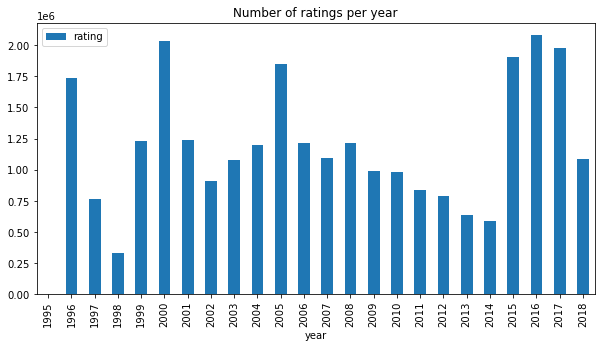

In [ ]:
ratings[['year', 'rating']].groupby(['year']).count().reset_index().plot.bar(x='year', y='rating', title='Number of ratings per year', figsize=(10, 5))

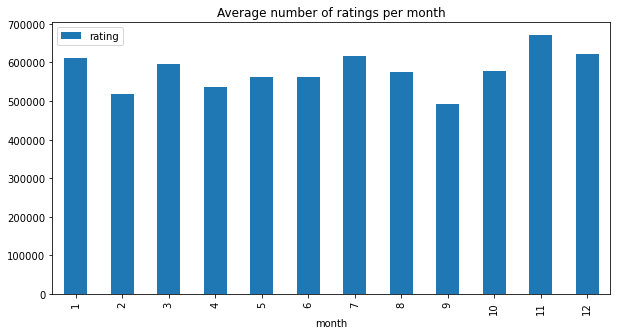

In [ ]:
df_temp = ratings[['month', 'rating']].groupby(['month']).count().reset_index()
df_temp['rating'] = df_temp['rating'] / 4
df_temp.plot.bar(x='month', y='rating', title='Average number of ratings per month', figsize=(10, 5));

In [ ]:
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


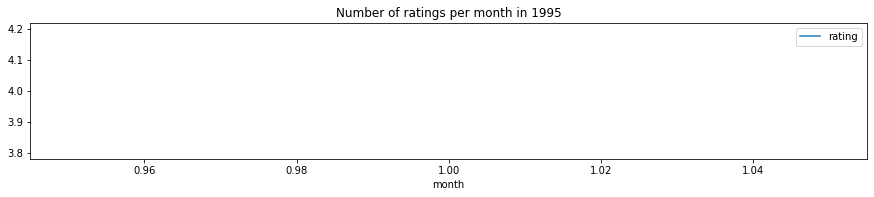

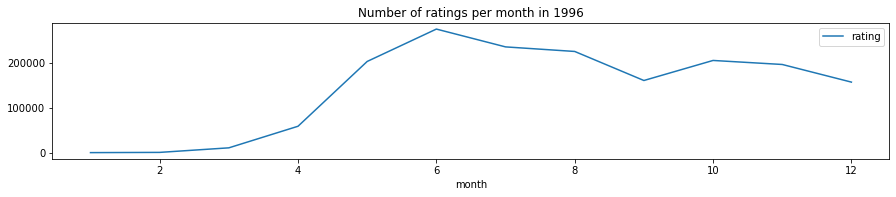

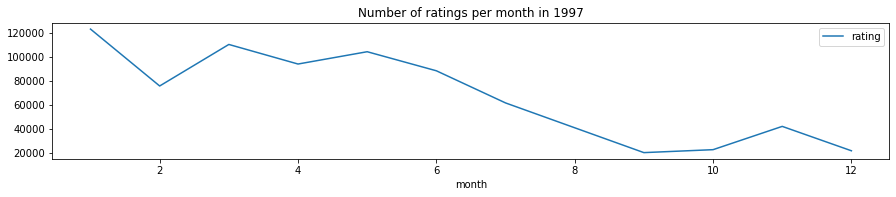

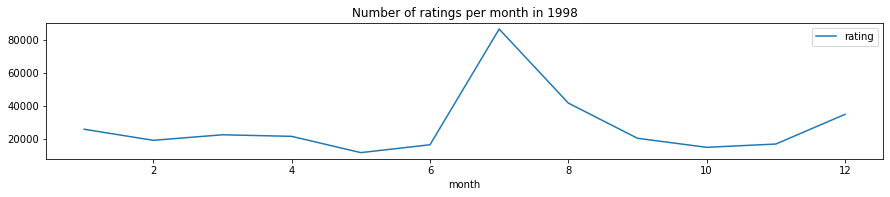

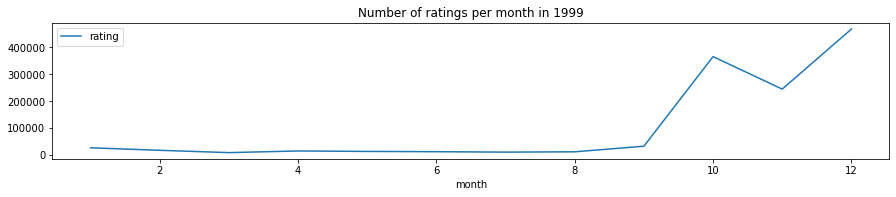

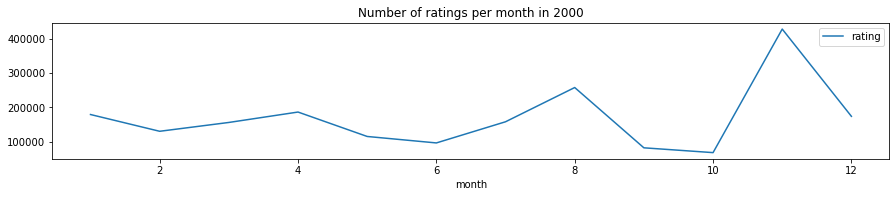

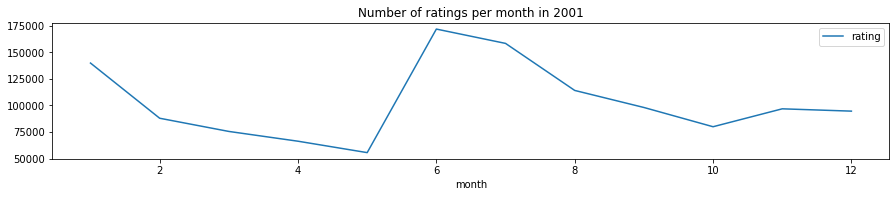

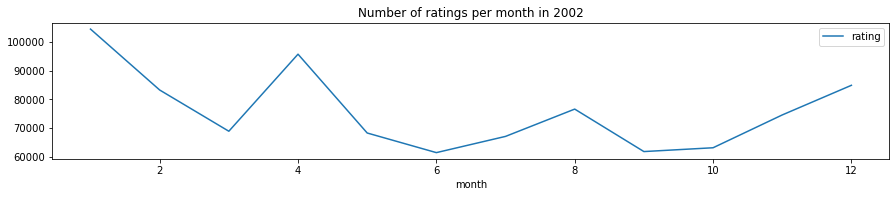

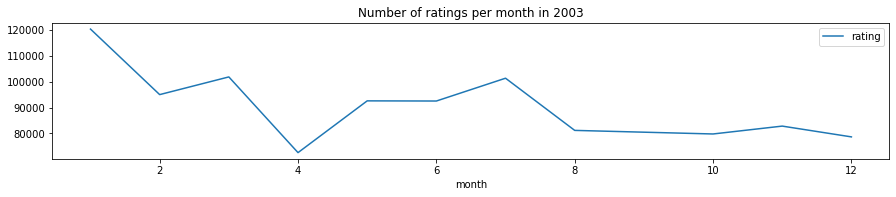

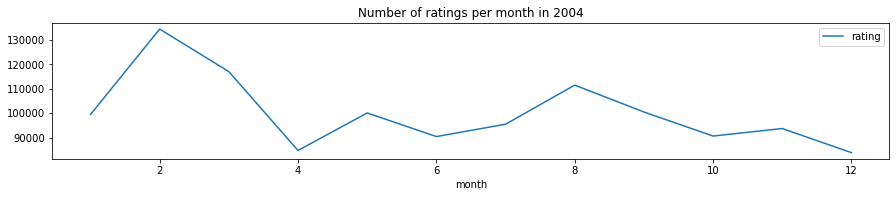

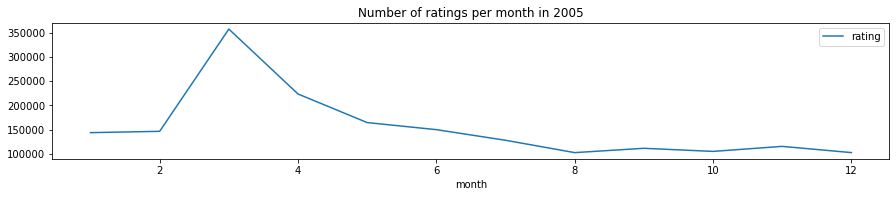

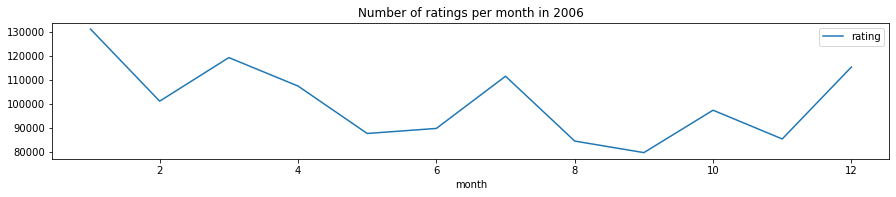

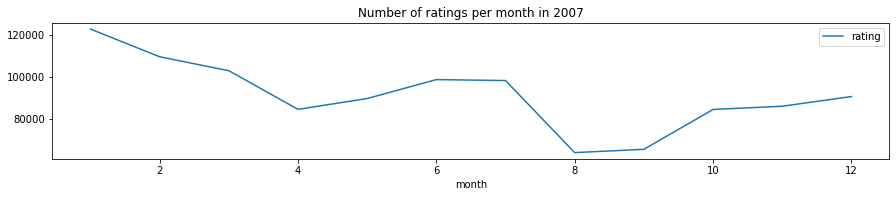

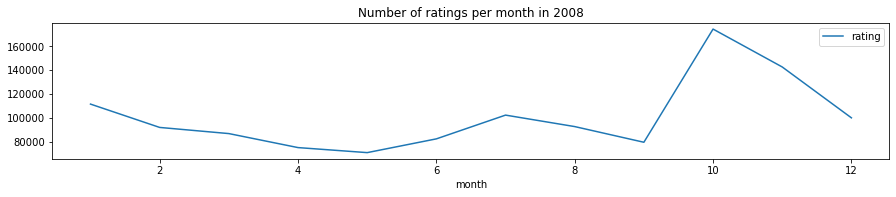

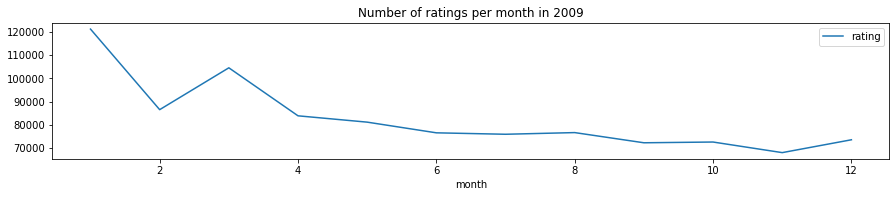

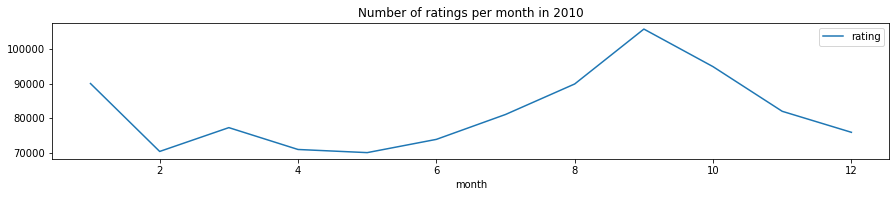

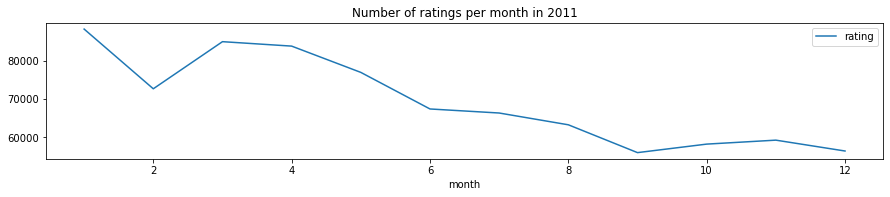

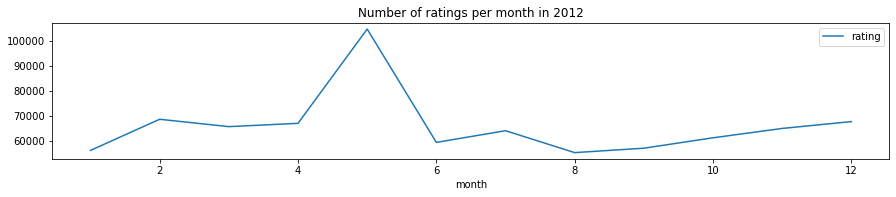

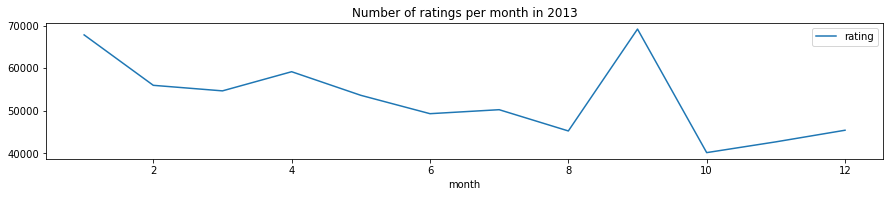

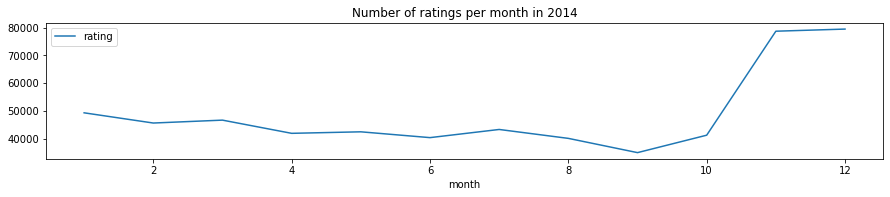

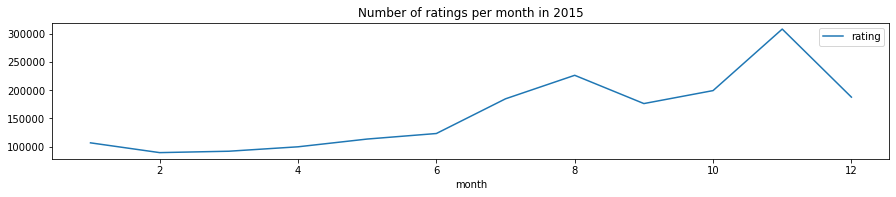

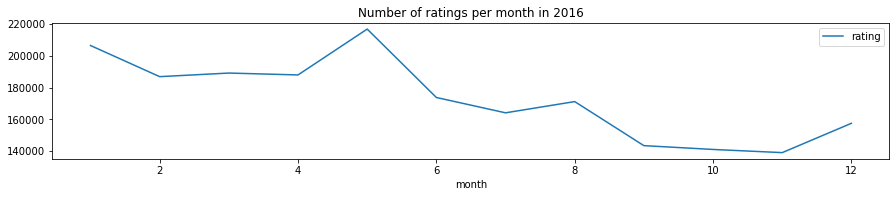

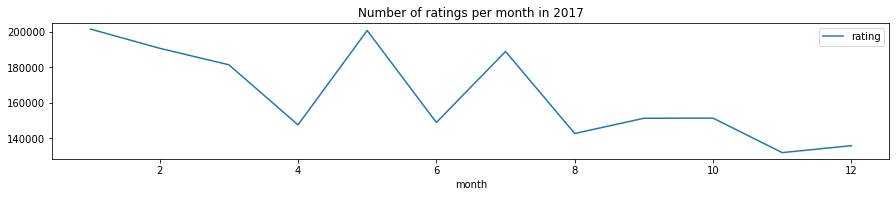

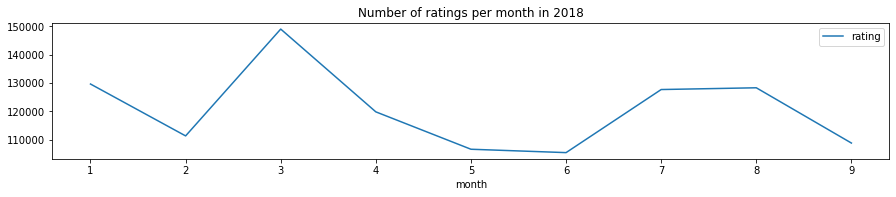

In [ ]:
df_temp = ratings[['year', 'month', 'rating']].groupby(['year', 'month']).count().reset_index()
for year in df_temp['year'].unique():
    df_temp.loc[df_temp['year'] == year].plot('month', 'rating', title='Number of ratings per month in %s' %year, figsize=(15, 2.5))

<AxesSubplot:>

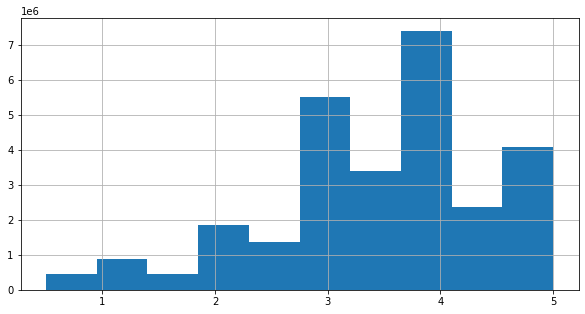

In [ ]:
ratings['rating'].hist(figsize=(10, 5))

### importing the Movies dataset

In [ ]:
movie_list = pd.read_csv('movies.csv')
len(movie_list)

58098

In [ ]:
movie_list.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


spliting the year from the movie titles

In [ ]:
movie_list['release_year'] = movie_list.title.str.extract("\((\d{4})\)", expand=True).astype(str)

In [ ]:
movie_list['release_year'] = pd.to_datetime(movie_list.release_year, format='%Y')
movie_list['release_year'] = movie_list.release_year.dt.year
movie_list['title'] = movie_list.title.str[:-7]

Checking the null values in the dataframe

In [ ]:
movie_list.isna().sum()

movieId           0
title             0
genres            0
release_year    327
dtype: int64

Dropping the null values

In [ ]:
movie_list=movie_list.dropna()

In [ ]:
movie_list['release_year']=movie_list['release_year'].astype(int)

Printing unique genres. This is also given in the dataset description file

In [ ]:
genres_unique = pd.DataFrame(movie_list.genres.str.split('|').tolist()).stack().unique()
print('Unique genres', genres_unique)
genres_unique = pd.DataFrame(genres_unique, columns=['genres'])

Unique genres ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


Creating dummy dataset of splited genres

In [ ]:
df_movie = movie_list.join(movie_list.genres.str.get_dummies().astype(bool))
df_movie.drop('genres', inplace=True, axis=1)
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57771 entries, 0 to 58097
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             57771 non-null  int64 
 1   title               57771 non-null  object
 2   release_year        57771 non-null  int64 
 3   (no genres listed)  57771 non-null  bool  
 4   Action              57771 non-null  bool  
 5   Adventure           57771 non-null  bool  
 6   Animation           57771 non-null  bool  
 7   Children            57771 non-null  bool  
 8   Comedy              57771 non-null  bool  
 9   Crime               57771 non-null  bool  
 10  Documentary         57771 non-null  bool  
 11  Drama               57771 non-null  bool  
 12  Fantasy             57771 non-null  bool  
 13  Film-Noir           57771 non-null  bool  
 14  Horror              57771 non-null  bool  
 15  IMAX                57771 non-null  bool  
 16  Musical             57

In [ ]:
df_movie.head()

,movieId,title,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


Finding the number of movie years and printing them

In [ ]:
print('#Unique movie release years:', df_movie.release_year.nunique())
temp = df_movie.release_year.unique()
temp.sort()
print(temp)

#Unique movie release years: 134
[1874 1878 1883 1887 1888 1890 1891 1892 1893 1894 1895 1896 1897 1898
 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912
 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926
 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018]


Vistualizing number of movies realised per year

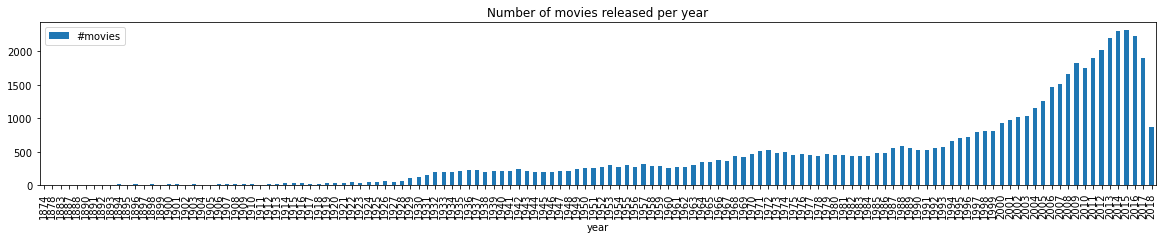

In [ ]:
df_temp = df_movie[['release_year', 'movieId']].groupby(['release_year']).count().reset_index().rename(columns={'release_year':'year', 'movieId':'#movies'})
df_temp.plot.bar('year', '#movies', title='Number of movies released per year', figsize=(20, 3));

merging rating and movie dataset for processing

In [ ]:
merged_dataset = pd.merge(movie_list, ratings)
merged_dataset.head()

,movieId,title,genres,release_year,userId,rating,timestamp,year,month,date
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,150485,4.0,1996-01-29 00:00:00,1996,1,1996-01-29
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,274913,4.0,1996-01-29 23:54:20,1996,1,1996-01-29
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,264347,5.0,1996-02-01 14:33:23,1996,2,1996-02-01
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,272608,5.0,1996-02-01 19:48:55,1996,2,1996-02-01
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,53271,4.0,1996-02-02 10:01:54,1996,2,1996-02-02


In [ ]:
avg_highly_rated_movies = merged_dataset.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()

## Data Understanding

In [ ]:
print("Number of movies with 5 star rating on average: ",len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0]))
print("Number of movies with above 4 star and below 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("Number of movies with above 3 star and below 4 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("Number of movies with above 2 star and below 3 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("Number of movies with above 1 star and below 2 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("Number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] < 1.0)]))

Number of movies with 5 star rating on average:  490
Number of movies with above 4 star and below 5 star rating on average:  3438
Number of movies with above 3 star and below 4 star rating on average:  28494
Number of movies with above 2 star and below 3 star rating on average:  14844
Number of movies with above 1 star and below 2 star rating on average:  2751
Number of movies with below 1 star rating on average:  573


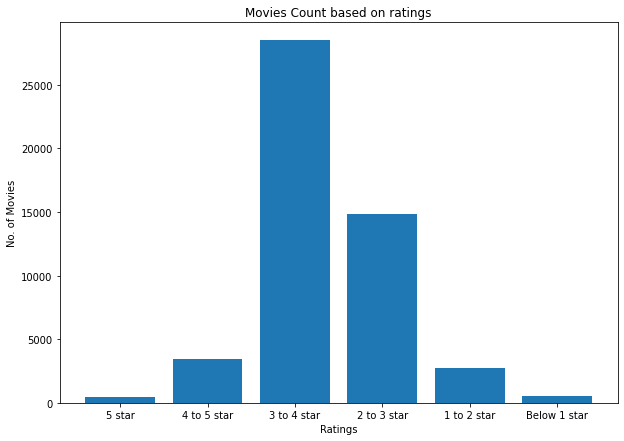

In [ ]:
labels = '5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star','Below 1 star'
sizes = [490,3438,28494,14844,2751,573]
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(labels, sizes)
plt.xlabel("Ratings")
plt.ylabel("No. of Movies")
plt.title("Movies Count based on ratings")

# Show Plot
plt.show()

Ploting the total distribution of genres in the merged dataset

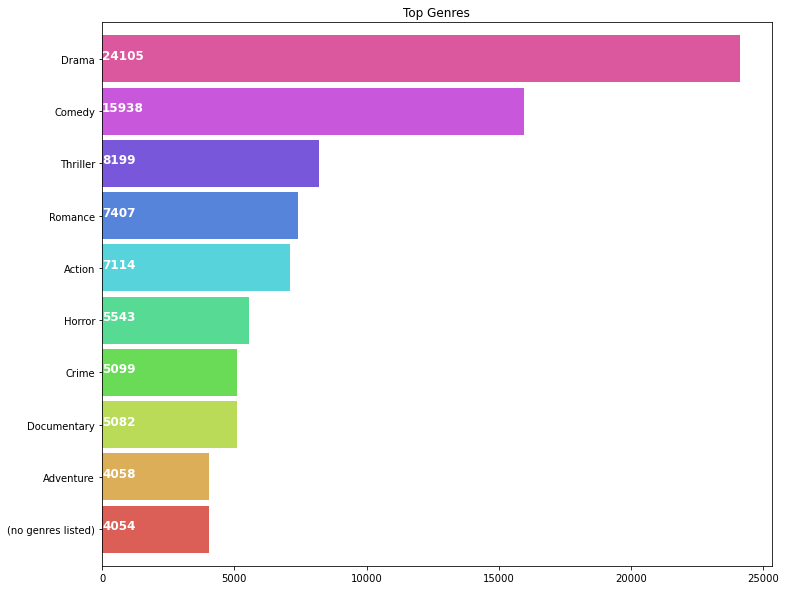

In [ ]:
movie_list['genres'] = movie_list['genres'].str.split('|')
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(12,10))
list1 = []
for i in movie_list['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [ ]:
genres = movie_list['genres']
genres.head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object

### **Vistualizing the word Cloud**

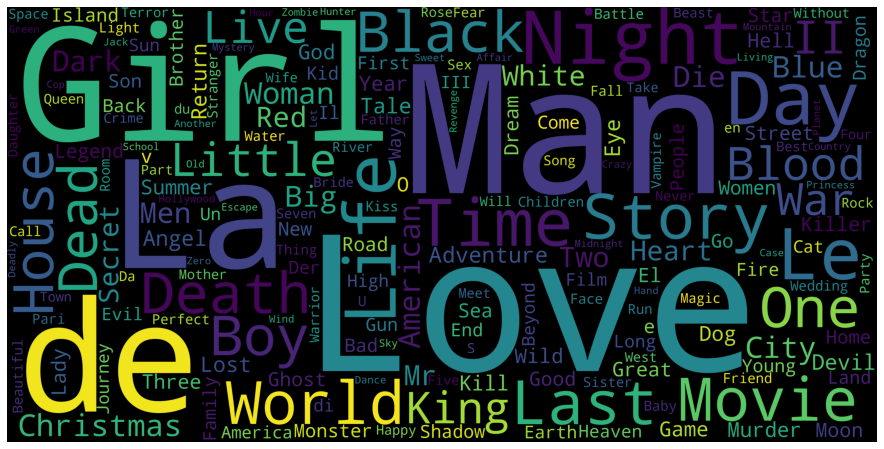

In [ ]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movie_list['title'] = movie_list['title'].fillna("").astype('str')
title_corpus = ' '.join(movie_list['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
genre_list = ""
movie_list = pd.read_csv('movies.csv')
for index,row in movie_list.iterrows():
        genre_list += row.genres + "|"
#split the string into a list of values
genre_list_split = genre_list.split('|')
#de-duplicate values
new_list = list(set(genre_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
new_list

['Children',
 'Mystery',
 'Adventure',
 'Drama',
 'Thriller',
 'Crime',
 'Action',
 'Animation',
 'Documentary',
 'Comedy',
 'Sci-Fi',
 'Musical',
 '(no genres listed)',
 'Film-Noir',
 'War',
 'Fantasy',
 'Romance',
 'IMAX',
 'Western',
 'Horror']

Enriching the movies dataset by adding the various genres columns.

In [ ]:
movies_with_genres = movie_list.copy()

for genre in new_list :
    movies_with_genres[genre] = movies_with_genres.apply(lambda _:int(genre in _.genres), axis = 1)
movies_with_genres.head()

,movieId,title,genres,Children,Mystery,Adventure,Drama,Thriller,Crime,Action,...,Sci-Fi,Musical,(no genres listed),Film-Noir,War,Fantasy,Romance,IMAX,Western,Horror
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finding the average rating for movie and the number of ratings for each movie

In [ ]:
avg_movie_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean','count']))
#avg_movie_rating['movieId']= avg_movie_rating.index
# inspecting the average movie rating data frame
avg_movie_rating.head()

,mean,count
movieId,,
1,3.886649,68469
2,3.246583,27143
3,3.173981,15585
4,2.874540,2989
5,3.077291,15474


In [ ]:
len(avg_movie_rating)

53889

In [ ]:
#Get the average movie rating across all movies 
avg_rating_all=ratings['rating'].mean()
avg_rating_all
#set a minimum threshold for number of reviews that the movie has to have
min_reviews=30
min_reviews
movie_score = avg_movie_rating.loc[avg_movie_rating['count']>min_reviews]
movie_score.head()

,mean,count
movieId,,
1,3.886649,68469
2,3.246583,27143
3,3.173981,15585
4,2.874540,2989
5,3.077291,15474


Merging movie details to movie ratings

In [ ]:
movies_with_genres.index.name = None
movies_with_genres = movies_with_genres.rename_axis(None) 
movie_score = pd.merge(movie_score,movies_with_genres,on='movieId')
movie_score.head()

,movieId,mean,count,title,genres,Children,Mystery,Adventure,Drama,Thriller,...,Sci-Fi,Musical,(no genres listed),Film-Noir,War,Fantasy,Romance,IMAX,Western,Horror
0,1,3.886649,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,3.246583,27143,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,3.173981,15585,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,2.874540,2989,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5,3.077291,15474,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


list top scored movies over the whole range of movies

In [ ]:

pd.DataFrame(movie_score.sort_values(['mean'],ascending=False)[['title','count','mean','genres']][:10])

,title,count,mean,genres
15381,Planet Earth II (2016),853,4.486518,Documentary
15012,Planet Earth (2006),1384,4.458092,Documentary
312,"Shawshank Redemption, The (1994)",97999,4.424188,Crime|Drama
15351,Band of Brothers (2001),984,4.399898,Action|Drama|War
15747,The Reichenbach Fall (2012),48,4.375000,Crime|Drama|Mystery
15455,Black Mirror: White Christmas (2014),1074,4.350559,Drama|Horror|Mystery|Sci-Fi|Thriller
15393,Cosmos,157,4.343949,(no genres listed)
15417,The Godfather Trilogy: 1972-1990 (1992),421,4.339667,(no genres listed)
814,"Godfather, The (1972)",60904,4.332893,Crime|Drama
49,"Usual Suspects, The (1995)",62180,4.291959,Crime|Mystery|Thriller


In [ ]:
# Gives the best movies according to genre based on mean rating
def best_movies_by_genre(genre,top_n):
    return pd.DataFrame(movie_score.loc[(movie_score[genre]==1)].sort_values(['mean'],ascending=False)[['title','count','mean','genres']][:top_n])

Top 10 Musical Movies

In [ ]:
best_movies_by_genre('Musical',10)  

,title,count,mean,genres
13884,The Pokrovsky Gates (1983),76,4.098684,Comedy|Drama|Musical|Romance
2674,Stop Making Sense (1984),2452,4.096860,Documentary|Musical
1186,Duck Soup (1933),6312,4.083333,Comedy|Musical|War
897,Top Hat (1935),2297,4.039617,Comedy|Musical|Romance
851,Singin' in the Rain (1952),12794,4.025207,Comedy|Musical|Romance
6570,"Night at the Opera, A (1935)",1835,4.001362,Comedy|Musical|Romance
7311,"Day at the Races, A (1937)",1002,3.966567,Comedy|Musical
1011,Shall We Dance (1937),1519,3.962804,Comedy|Musical|Romance
10745,Dr. Horrible's Sing-Along Blog (2008),4748,3.959035,Comedy|Drama|Musical|Sci-Fi
7058,Monterey Pop (1968),309,3.954693,Documentary|Musical


Top 10 Action Movies

In [ ]:
#run function to return top recommended movies by genre
best_movies_by_genre('Action',10)  

,title,count,mean,genres
15351,Band of Brothers (2001),984,4.399898,Action|Drama|War
1861,Seven Samurai (Shichinin no samurai) (1954),14578,4.254116,Action|Adventure|Drama
2769,Fight Club (1999),65678,4.230663,Action|Crime|Drama|Thriller
860,North by Northwest (1959),19613,4.201091,Action|Adventure|Mystery|Romance|Thriller
14733,Can't Change the Meeting Place (1979),119,4.197479,Action|Crime
5602,City of God (Cidade de Deus) (2002),21558,4.184897,Action|Adventure|Crime|Drama|Thriller
2837,Yojimbo (1961),4328,4.179298,Action|Adventure
10197,"Dark Knight, The (2008)",44741,4.173756,Action|Crime|Drama|IMAX
11522,Inception (2010),41475,4.162990,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
2394,"Matrix, The (1999)",84545,4.149695,Action|Sci-Fi|Thriller


Merging ratings and movies dataframes

In [ ]:
ratings_movies = pd.merge(ratings,movie_list, on = 'movieId')
ratings_movies

,userId,movieId,rating,timestamp,year,month,date,title,genres
0,56769,1176,4.0,1995-01-09 11:46:44,1995,1,1995-01-09,"Double Life of Veronique, The (Double Vie de V...",Drama|Fantasy|Romance
1,51073,1176,1.0,1996-10-23 10:01:56,1996,10,1996-10-23,"Double Life of Veronique, The (Double Vie de V...",Drama|Fantasy|Romance
2,281674,1176,3.0,1996-10-23 13:56:28,1996,10,1996-10-23,"Double Life of Veronique, The (Double Vie de V...",Drama|Fantasy|Romance
3,273749,1176,2.0,1996-10-26 08:09:34,1996,10,1996-10-26,"Double Life of Veronique, The (Double Vie de V...",Drama|Fantasy|Romance
4,282742,1176,4.0,1996-10-26 11:53:55,1996,10,1996-10-26,"Double Life of Veronique, The (Double Vie de V...",Drama|Fantasy|Romance
...,...,...,...,...,...,...,...,...,...
27753439,144093,192649,4.0,2018-09-26 02:04:46,2018,9,2018-09-26,My Hero Academia the Movie: The Two Heroes (2018),Action|Animation
27753440,181577,193779,0.5,2018-09-26 02:59:28,2018,9,2018-09-26,We Have Always Lived in the Castle (2018),Drama|Mystery|Thriller
27753441,181577,193603,0.5,2018-09-26 03:05:50,2018,9,2018-09-26,A Faithful Man (2018),Comedy|Drama
27753442,181577,191487,0.5,2018-09-26 03:05:53,2018,9,2018-09-26,God Bless the Broken Road (2018),Drama


Gets the other top 10 movies which are watched by the people who saw a particular movie

In [ ]:
def get_other_movies(movie_name):
    #get all users who watched a specific movie
    df_movie_users_series = ratings_movies.loc[ratings_movies['title']==movie_name]['userId']
    #convert to a data frame
    df_movie_users = pd.DataFrame(df_movie_users_series,columns=['userId'])
    #get a list of all other movies watched by these users
    other_movies = pd.merge(df_movie_users,ratings_movies,on='userId')
    #get a list of the most commonly watched movies by these other user
    other_users_watched = pd.DataFrame(other_movies.groupby('title')['userId'].count()).sort_values('userId',ascending=False)
    other_users_watched['perc_who_watched'] = round(other_users_watched['userId']*100/other_users_watched['userId'][0],1)
    return other_users_watched[1:11]

In [ ]:
get_other_movies('Gone Girl (2014)')

,userId,perc_who_watched
title,,
Inception (2010),10337,80.2
"Matrix, The (1999)",9760,75.7
"Shawshank Redemption, The (1994)",9584,74.3
Fight Club (1999),9411,73.0
"Dark Knight, The (2008)",9167,71.1
Interstellar (2014),9096,70.5
Forrest Gump (1994),8898,69.0
Pulp Fiction (1994),8383,65.0
"Lord of the Rings: The Fellowship of the Ring, The (2001)",8247,64.0


In [ ]:
get_other_movies('Inception (2010)')

,userId,perc_who_watched
title,,
"Matrix, The (1999)",31878,76.9
"Dark Knight, The (2008)",28402,68.5
"Shawshank Redemption, The (1994)",28357,68.4
Fight Club (1999),27867,67.2
"Lord of the Rings: The Return of the King, The (2003)",26254,63.3
"Lord of the Rings: The Fellowship of the Ring, The (2001)",26037,62.8
Forrest Gump (1994),25024,60.3
"Lord of the Rings: The Two Towers, The (2002)",24275,58.5
Pulp Fiction (1994),23676,57.1


In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
avg_movie_rating.head()

,mean,count
movieId,,
1,3.886649,68469
2,3.246583,27143
3,3.173981,15585
4,2.874540,2989
5,3.077291,15474


In [ ]:
movie_plus_10_ratings = avg_movie_rating.loc[avg_movie_rating['count']>=10]
print(len(movie_plus_10_ratings))

23716


In [ ]:
movie_plus_10_ratings

,mean,count
movieId,,
1,3.886649,68469
2,3.246583,27143
3,3.173981,15585
4,2.874540,2989
5,3.077291,15474
...,...,...
192579,3.100000,20
192697,3.363636,11
192849,3.318182,11


Including movies with more than 10 ratings only

In [ ]:
filtered_ratings = pd.merge(movie_plus_10_ratings, ratings, on="movieId")
len(filtered_ratings)

27661139

In [ ]:
filtered_ratings.head()

,movieId,mean,count,userId,rating,timestamp,year,month,date
0,1,3.886649,68469,150485,4.0,1996-01-29 00:00:00,1996,1,1996-01-29
1,1,3.886649,68469,274913,4.0,1996-01-29 23:54:20,1996,1,1996-01-29
2,1,3.886649,68469,264347,5.0,1996-02-01 14:33:23,1996,2,1996-02-01
3,1,3.886649,68469,272608,5.0,1996-02-01 19:48:55,1996,2,1996-02-01
4,1,3.886649,68469,53271,4.0,1996-02-02 10:01:54,1996,2,1996-02-02


In [ ]:
filtered_ratings1=filtered_ratings.head(15000000)

In [ ]:
#create a matrix table with movieIds on the rows and userIds in the columns.
movie_wide = filtered_ratings1.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0) #replace NAN values with 0
movie_wide.head()

userId,1,2,3,4,5,6,7,8,9,10,...,283219,283220,283221,283222,283223,283224,283225,283226,283227,283228
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Implimenting the KNN

Ploting the elbow point to find the K

In [ ]:
def elbow_plot(df):
    """Create elbow plot from normalized data"""
    
    sse = {}
    
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(movie_wide)
        sse[k] = kmeans.inertia_
    
        plt.title('Elbow plot for K selection')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()

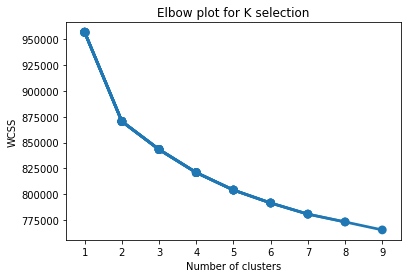

In [ ]:

elbow_plot(movie_wide)

Specify model parameters and fit model to the dataset

In [ ]:
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(movie_wide)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def print_similar_movies(movie_name) :
    #get the list of user ratings for a specific userId
    query_index = movie_list.loc[movie_list['title']==movie_name]['movieId'].dropna().values[0]
    query_index_movie_ratings = movie_wide.loc[query_index,:].values.reshape(1,-1)
    #get the closest 10 movies and their distances from the movie specified
    distances,indices = model_knn.kneighbors(query_index_movie_ratings,n_neighbors = 5) 
    #write a loop that prints the similar movies for a specified movie.
    for i in range(0,len(distances.flatten())):
        #get the title of the random movie that was chosen
        get_movie = movie_list.loc[movie_list['movieId']==query_index]['title']
        #for the first movie in the list i.e closest print the title
        if i==0:
            print('Recommendations for {0}:\n'.format(get_movie))
        else :
            #get the indiciees for the closest movies
            indices_flat = indices.flatten()[i]
            #get the title of the movie
            get_movie = movie_list.loc[movie_list['movieId']==movie_wide.iloc[indices_flat,:].name]['title']
            #print the movie
            print('{0}: {1}, with distance of {2}:'.format(i,get_movie,distances.flatten()[i]))

In [ ]:
print_similar_movies('Toy Story (1995)')

Recommendations for 0    Toy Story (1995)
Name: title, dtype: object:

1: 2355    Toy Story 2 (1999)
Name: title, dtype: object, with distance of 0.42739873968028474:
2: 418    Jurassic Park (1993)
Name: title, dtype: object, with distance of 0.43436319591384365:
3: 615    Independence Day (a.k.a. ID4) (1996)
Name: title, dtype: object, with distance of 0.43573830647233414:
4: 224    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object, with distance of 0.4426118294200636:
